Link to dataset: 
http://archive.ics.uci.edu/ml/datasets/Bank+Marketing 

Metrics attribute: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

Scoring parameter in cross_val_score: http://scikit-learn.org/stable/modules/model_evaluation.html 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 70) #https://stackoverflow.com/questions/11707586/python-pandas-how-to-widen-output-display-to-see-more-columns
pd.set_option('display.max_rows', 25)

In [3]:
clients = pd.read_csv('bank-additional-full.csv')
clients.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
type(clients)

pandas.core.frame.DataFrame

In [5]:
#41,188 rows and 21 columns
clients.shape

(41188, 21)

In [6]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [7]:
clients.isnull().sum() #no null values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
for i in clients.columns.tolist():  #Skim through the variables
    print(i)
    print(clients[i].value_counts())

#clients.columns[0]
#clients.job.value_counts()
#clients[job].value_counts()
#clients.groupby('job').job.count().sort_values(ascending=False)

age
31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
38    1407
41    1278
      ... 
85      15
79      14
86       8
84       7
17       5
92       4
98       2
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
d

In [9]:
clients.duplicated().sum()

12

In [10]:
is_duplicate = clients.duplicated(keep=False)
#clients[is_duplicate] --- to check if indeed the 12 rows are dups

In [11]:
clients.drop_duplicates(keep="first", inplace=True)

In [12]:
clients.reset_index(drop=True, inplace=True) #reset index after dropping dups

In [13]:
clients.shape

(41176, 21)

In [14]:
features = clients.iloc[:,:-1].drop(columns=['education'])
edu = clients['education']
target = clients.iloc[:,-1]

In [15]:
features.head()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [16]:
target.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [17]:
pd.get_dummies(features).head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [18]:
features_dummy = pd.get_dummies(features).drop(columns=['job_unknown', 'marital_unknown', 'default_unknown', 
                                                        'housing_unknown', 'loan_unknown', 'contact_telephone', 
                                                        'month_apr', 'day_of_week_mon', 'poutcome_nonexistent'])
#k-level of cat variables are represented by (k-1) dummy variable in the dataset

In [19]:
features_dummy.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [20]:
#education variable is ordinal, therefore manual mapping is done here.
edu_mapping={'unknown':0, 'illiterate':1, 'basic.4y':2, 'basic.6y':3, 'basic.9y':4, 'high.school':5, 'professional.course':6, 
            'university.degree':7}
edu_LE = np.array(edu.map(edu_mapping))
edu_ordinal=pd.Series(edu_LE)
edu_ordinal.name='edu_ordinal'

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_LE = le.fit_transform(target.values)

In [22]:
y_coded=pd.Series(y_LE)

In [23]:
features_dummy.shape

(41176, 46)

In [24]:
edu_ordinal.shape

(41176,)

In [25]:
y_coded.shape

(41176,)

In [26]:
y_coded.name='y_coded'

In [27]:
clients_all = pd.concat([features_dummy, edu_ordinal, y_coded], axis=1) #combine all variables tog after necc. processing

#interim = pd.merge(features_dummy, pd.DataFrame(edu_ordinal), left_index=True, right_index=True)
#clients_all = pd.merge(interim, pd.DataFrame(y_coded),left_index=True, right_index=True)
#clients_all = pd.concat([features_dummy, edu_ordinal, y_coded], axis=1, join_axes=[features_dummy.index])
#interim1 = pd.concat((features_dummy, edu_ordinal), axis=1)
#clients_all = pd.concat((interim1,y_coded), axis=1)
#interim1 = features_dummy.join(edu_ordinal)
#clients_all = interim1.join(y_coded)
#clients_all = pd.concat([features_dummy, edu_ordinal, y_coded], axis=1, join_axes=[features_dummy.index])
#https://pandas.pydata.org/pandas-docs/version/0.20/merging.html

In [28]:
clients_all.tail()
#clients_all.to_csv('file.csv', sep='\t')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_success,edu_ordinal,y_coded
41171,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,6,1
41172,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,6,0
41173,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,7,0
41174,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,6,1
41175,74,239,3,999,1,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,6,0


In [29]:
clients_all.shape

(41176, 48)

In [30]:
clients_all.y_coded.value_counts()

0    36537
1     4639
Name: y_coded, dtype: int64

In [31]:
from sklearn.preprocessing import MinMaxScaler #normalise all variables in clients_all dataset into (0,1) scale
mms = MinMaxScaler()
clients_all_norm = mms.fit_transform(clients_all)

In [32]:
clients_all_norm = pd.DataFrame(clients_all_norm, columns = clients_all.columns) 

#converting normalised array into a dataframe and assigning column names to it
#https://stackoverflow.com/questions/29586323/how-to-retain-column-headers-of-data-frame-after-pre-processing-in-scikit-learn

In [33]:
clients_all_norm = clients_all_norm.drop(['duration'], axis=1) 
#drop duration variable as suggested by dataset source: https://archive.ics.uci.edu/ml/datasets/bank+marketing
clients_all_norm.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_success,edu_ordinal,y_coded
0,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285714,0.0
1,0.493827,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.714286,0.0
2,0.246914,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.714286,0.0
3,0.283951,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.428571,0.0
4,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.714286,0.0


In [34]:
X_Matrix = clients_all_norm.iloc[:,:-1] #Separating dataset into features & target variable
X_Matrix.shape

(41176, 46)

In [35]:
y_series = clients_all_norm.y_coded #Separating dataset into features & target variable
y_series.value_counts()

0.0    36537
1.0     4639
Name: y_coded, dtype: int64

# Method 1: OVERSAMPLING -Taking Bootstrap samples of minority class

## <font color='blue'>LOG REG</font>

In [40]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [41]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    training_set = pd.concat([X_train,y_train], axis=1)
    
    #from sklearn.utils import resample
    training_majority = training_set[training_set.y_coded==0]
    training_minority = training_set[training_set.y_coded==1]

    training_minority_upsampled = resample(training_minority, replace=True, n_samples=training_majority.shape[0], random_state=1)
    all_training_upsampled = pd.concat([training_majority,training_minority_upsampled], axis=0)

    X_train_upsampled = all_training_upsampled.iloc[:,:-1]
    y_train_upsampled = all_training_upsampled.iloc[:,-1]

    logreg=LogisticRegression(random_state=1)

    logreg.fit(X_train_upsampled,y_train_upsampled)
    pred_train = logreg.predict(X_train_upsampled)
    true_train = y_train_upsampled
    pred = logreg.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

Fold 1:
accuracy score of training set: 0.749
accuracy score of test set: 0.834
auc score of test set: 0.733
recall score of test set: 0.601
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.86      0.90     12131
        1.0       0.37      0.60      0.46      1595

avg / total       0.88      0.83      0.85     13726

 
Fold 2:
accuracy score of training set: 0.739
accuracy score of test set: 0.819
auc score of test set: 0.751
recall score of test set: 0.664
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.84      0.89     12240
        1.0       0.33      0.66      0.44      1485

avg / total       0.89      0.82      0.84     13725

 
Fold 3:
accuracy score of training set: 0.748
accuracy score of test set: 0.824
auc score of test set: 0.737
recall score of test set: 0.623
classification report of test set: 
             precision    recall  f

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
training_set = pd.concat([X_train,y_train], axis=1)

from sklearn.utils import resample
training_majority = training_set[training_set.y_coded==0]
training_minority = training_set[training_set.y_coded==1]

training_minority_upsampled = resample(training_minority, replace=True, n_samples=training_majority.shape[0], random_state=1)
all_training_upsampled = pd.concat([training_majority,training_minority_upsampled], axis=0)

X_train_upsampled = all_training_upsampled.iloc[:,:-1]
y_train_upsampled = all_training_upsampled.iloc[:,-1]

logreg=LogisticRegression(random_state=1)

logreg.fit(X_train_upsampled,y_train_upsampled)
pred_train = logreg.predict(X_train_upsampled)
true_train = y_train_upsampled
pred = logreg.predict(X_test)
true = y_test

print("confusion matrix: ") 
print(str(metrics.confusion_matrix(true, pred)))
print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

confusion matrix: 
[[9382 1585]
 [ 494  892]]
accuracy score of training set: 0.736
accuracy score of test set: 0.832
auc score of test set: 0.75
recall score of test set: 0.644
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.86      0.90     10967
        1.0       0.36      0.64      0.46      1386

avg / total       0.88      0.83      0.85     12353



In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
training_set = pd.concat([X_train,y_train], axis=1)

training_majority = training_set[training_set.y_coded==0]
training_minority = training_set[training_set.y_coded==1]

#from sklearn.utils import resample
training_minority_upsampled = resample(training_minority, replace=True, n_samples=training_majority.shape[0], random_state=1)
all_training_upsampled = pd.concat([training_majority,training_minority_upsampled], axis=0)

X_train_upsampled = all_training_upsampled.iloc[:,:-1]
y_train_upsampled = all_training_upsampled.iloc[:,-1]

logreg=LogisticRegression(random_state=1)

logreg.fit(X_train_upsampled,y_train_upsampled)
pred_train = logreg.predict(X_train_upsampled)
true_train = y_train_upsampled
pred = logreg.predict(X_test)
true = y_test

print("confusion matrix: ") 
print(str(metrics.confusion_matrix(true, pred)))
print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

confusion matrix: 
[[6270 1044]
 [ 343  579]]
accuracy score of training set: 0.746
accuracy score of test set: 0.832
auc score of test set: 0.743
recall score of test set: 0.628
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.86      0.90      7314
        1.0       0.36      0.63      0.46       922

avg / total       0.88      0.83      0.85      8236



## <font color='blue'>KNN</font>

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
#computationally expensive (time consuming) to do cv on KNN

In [46]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True, random_state=1)
for i in range(1,9):
    for train_index, test_index in kf.split(clients_all_norm):
        X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
        y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
        training_set = pd.concat([X_train,y_train], axis=1)
    
        training_majority = training_set[training_set.y_coded==0]
        training_minority = training_set[training_set.y_coded==1]

        #from sklearn.utils import resample
        training_minority_upsampled = resample(training_minority, replace=True, n_samples=training_majority.shape[0], random_state=1)
        all_training_upsampled = pd.concat([training_majority,training_minority_upsampled], axis=0)

        X_train_upsampled = all_training_upsampled.iloc[:,:-1]
        y_train_upsampled = all_training_upsampled.iloc[:,-1]
    
        knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1) #instantiate knn class
        knn.fit(X_train_upsampled, y_train_upsampled)
    
        pred_train = knn.predict(X_train_upsampled)
        true_train = y_train_upsampled
        pred = knn.predict(X_test)
        true = y_test
    
    print("K="+ str(i)+ " " +"accuracy of training set: " + str(round(metrics.accuracy_score(true_train, pred_train),3)))
    print("  "+ " "+ " " +"accuracy of test set: " + str(round(metrics.accuracy_score(true, pred),3)))
    print("  "+ " "+ " " +"auc of test set: " + str(round(metrics.roc_auc_score(true, pred),3)))
    print("  "+ " "+ " " +"recall of test set: " + str(round(metrics.recall_score(true, pred),3)))
    print("  "+ " "+ " " +"classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")

K=1 accuracy of training set: 0.989
    accuracy of test set: 0.849
    auc of test set: 0.604
    recall of test set: 0.292
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.91      0.92      0.92     12229
        1.0       0.30      0.29      0.30      1496

avg / total       0.85      0.85      0.85     13725

 
K=2 accuracy of training set: 0.987
    accuracy of test set: 0.849
    auc of test set: 0.603
    recall of test set: 0.289
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.91      0.92      0.92     12229
        1.0       0.30      0.29      0.29      1496

avg / total       0.85      0.85      0.85     13725

 
K=3 accuracy of training set: 0.954
    accuracy of test set: 0.805
    auc of test set: 0.643
    recall of test set: 0.436
    classification report of test set: 
             precision    recall  f1-score   support

        0.0      

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
training_set = pd.concat([X_train,y_train], axis=1)

training_majority = training_set[training_set.y_coded==0]
training_minority = training_set[training_set.y_coded==1]

#from sklearn.utils import resample
training_minority_upsampled = resample(training_minority, replace=True, n_samples=training_majority.shape[0], random_state=1)
all_training_upsampled = pd.concat([training_majority,training_minority_upsampled], axis=0)

X_train_upsampled = all_training_upsampled.iloc[:,:-1]
y_train_upsampled = all_training_upsampled.iloc[:,-1]

knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1) #instantiate knn class

knn.fit(X_train_upsampled,y_train_upsampled)
pred_train = knn.predict(X_train_upsampled)
true_train = y_train_upsampled
pred = knn.predict(X_test)
true = y_test

print("confusion matrix: ") 
print(str(metrics.confusion_matrix(true, pred)))
print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

confusion matrix: 
[[8209 2758]
 [ 566  820]]
accuracy score of training set: 0.892
accuracy score of test set: 0.731
auc score of test set: 0.67
recall score of test set: 0.592
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.75      0.83     10967
        1.0       0.23      0.59      0.33      1386

avg / total       0.86      0.73      0.78     12353



In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
training_set = pd.concat([X_train,y_train], axis=1)

training_majority = training_set[training_set.y_coded==0]
training_minority = training_set[training_set.y_coded==1]

#from sklearn.utils import resample
training_minority_upsampled = resample(training_minority, replace=True, n_samples=training_majority.shape[0], random_state=1)
all_training_upsampled = pd.concat([training_majority,training_minority_upsampled], axis=0)

X_train_upsampled = all_training_upsampled.iloc[:,:-1]
y_train_upsampled = all_training_upsampled.iloc[:,-1]

knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1) #instantiate knn class

knn.fit(X_train_upsampled,y_train_upsampled)
pred_train = knn.predict(X_train_upsampled)
true_train = y_train_upsampled
pred = knn.predict(X_test)
true = y_test

print("confusion matrix: ") 
print(str(metrics.confusion_matrix(true, pred)))
print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

confusion matrix: 
[[5561 1753]
 [ 381  541]]
accuracy score of training set: 0.895
accuracy score of test set: 0.741
auc score of test set: 0.674
recall score of test set: 0.587
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.76      0.84      7314
        1.0       0.24      0.59      0.34       922

avg / total       0.86      0.74      0.78      8236



## <font color='blue'>SVM</font>

## <font color='blue'>CART</font>

## <font color='blue'>RF</font>

## <font color='blue'>Naive Bayes</font>

## <font color='blue'>NN</font>

## <font color='blue'>AdaBoost</font>

## <font color='blue'>Gradient Boost</font>

## <font color='blue'>XG Boost</font>

# Method 2: UNDERSAMPLING -Taking smaller samples of majority class

## <font color='blue'>LOG REG</font>

In [49]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    training_set = pd.concat([X_train,y_train], axis=1)
    
    training_majority = training_set[training_set.y_coded==0]
    training_minority = training_set[training_set.y_coded==1]

    #from sklearn.utils import resample
    training_majority_downsampled = resample(training_majority, replace=True, n_samples=training_minority.shape[0], random_state=1)
    all_training_downsampled = pd.concat([training_majority_downsampled,training_minority], axis=0)

    X_train_downsampled = all_training_downsampled.iloc[:,:-1]
    y_train_downsampled = all_training_downsampled.iloc[:,-1]

    logreg=LogisticRegression(random_state=1)

    logreg.fit(X_train_downsampled,y_train_downsampled)
    pred_train = logreg.predict(X_train_downsampled)
    true_train = y_train_downsampled
    pred = logreg.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

Fold 1:
accuracy score of training set: 0.74
accuracy score of test set: 0.805
auc score of test set: 0.732
recall score of test set: 0.638
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.83      0.88     12180
        1.0       0.32      0.64      0.42      1546

avg / total       0.88      0.80      0.83     13726

 
Fold 2:
accuracy score of training set: 0.739
accuracy score of test set: 0.815
auc score of test set: 0.738
recall score of test set: 0.639
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.84      0.89     12185
        1.0       0.33      0.64      0.44      1540

avg / total       0.88      0.82      0.84     13725

 
Fold 3:
accuracy score of training set: 0.738
accuracy score of test set: 0.81
auc score of test set: 0.743
recall score of test set: 0.656
classification report of test set: 
             precision    recall  f1-

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
training_set = pd.concat([X_train,y_train], axis=1)

training_majority = training_set[training_set.y_coded==0]
training_minority = training_set[training_set.y_coded==1]

#from sklearn.utils import resample
training_majority_downsampled = resample(training_majority, replace=True, n_samples=training_minority.shape[0], random_state=1)
all_training_downsampled = pd.concat([training_majority_downsampled,training_minority], axis=0)

X_train_downsampled = all_training_downsampled.iloc[:,:-1]
y_train_downsampled = all_training_downsampled.iloc[:,-1]

logreg=LogisticRegression(random_state=1)

logreg.fit(X_train_downsampled,y_train_downsampled)
pred_train = logreg.predict(X_train_downsampled)
true_train = y_train_downsampled
pred = logreg.predict(X_test)
true = y_test

print("confusion matrix: ") 
print(str(metrics.confusion_matrix(true, pred)))
print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

confusion matrix: 
[[9173 1794]
 [ 458  928]]
accuracy score of training set: 0.739
accuracy score of test set: 0.818
auc score of test set: 0.753
recall score of test set: 0.67
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.84      0.89     10967
        1.0       0.34      0.67      0.45      1386

avg / total       0.88      0.82      0.84     12353



In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
training_set = pd.concat([X_train,y_train], axis=1)

training_majority = training_set[training_set.y_coded==0]
training_minority = training_set[training_set.y_coded==1]

#from sklearn.utils import resample
training_majority_downsampled = resample(training_majority, replace=True, n_samples=training_minority.shape[0], random_state=1)
all_training_downsampled = pd.concat([training_majority_downsampled,training_minority], axis=0)

X_train_downsampled = all_training_downsampled.iloc[:,:-1]
y_train_downsampled = all_training_downsampled.iloc[:,-1]

logreg=LogisticRegression(random_state=1)

logreg.fit(X_train_downsampled,y_train_downsampled)
pred_train = logreg.predict(X_train_downsampled)
true_train = y_train_downsampled
pred = logreg.predict(X_test)
true = y_test

print("confusion matrix: ") 
print(str(metrics.confusion_matrix(true, pred)))
print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

confusion matrix: 
[[6158 1156]
 [ 324  598]]
accuracy score of training set: 0.741
accuracy score of test set: 0.82
auc score of test set: 0.745
recall score of test set: 0.649
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.84      0.89      7314
        1.0       0.34      0.65      0.45       922

avg / total       0.88      0.82      0.84      8236



## <font color='blue'>KNN</font>

In [52]:
#computationally expensive (time consuming) to do cv on KNN

In [53]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True, random_state=1)
for i in range(1,9):
    for train_index, test_index in kf.split(clients_all_norm):
        X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
        y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
        training_set = pd.concat([X_train,y_train], axis=1)
    
        training_majority = training_set[training_set.y_coded==0]
        training_minority = training_set[training_set.y_coded==1]

        #from sklearn.utils import resample
        training_majority_downsampled = resample(training_majority, replace=True, n_samples=training_minority.shape[0], random_state=1)
        all_training_downsampled = pd.concat([training_majority_downsampled,training_minority], axis=0)

        X_train_downsampled = all_training_downsampled.iloc[:,:-1]
        y_train_downsampled = all_training_downsampled.iloc[:,-1]

        knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1) #instantiate knn class
        knn.fit(X_train_downsampled, y_train_downsampled)
    
        pred_train = knn.predict(X_train_downsampled)
        true_train = y_train_downsampled
        pred = knn.predict(X_test)
        true = y_test
    
    print("K="+ str(i)+ " " +"accuracy of training set: " + str(round(metrics.accuracy_score(true_train, pred_train),3)))
    print("  "+ " "+ " " +"accuracy of test set: " + str(round(metrics.accuracy_score(true, pred),3)))
    print("  "+ " "+ " " +"auc of test set: " + str(round(metrics.roc_auc_score(true, pred),3)))
    print("  "+ " "+ " " +"recall of test set: " + str(round(metrics.recall_score(true, pred),3)))
    print("  "+ " "+ " " +"classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")

K=1 accuracy of training set: 0.997
    accuracy of test set: 0.631
    auc of test set: 0.631
    recall of test set: 0.632
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.93      0.63      0.75     12229
        1.0       0.17      0.63      0.27      1496

avg / total       0.85      0.63      0.70     13725

 
K=2 accuracy of training set: 0.83
    accuracy of test set: 0.791
    auc of test set: 0.651
    recall of test set: 0.472
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.93      0.83      0.88     12229
        1.0       0.25      0.47      0.33      1496

avg / total       0.85      0.79      0.82     13725

 
K=3 accuracy of training set: 0.827
    accuracy of test set: 0.68
    auc of test set: 0.662
    recall of test set: 0.64
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
training_set = pd.concat([X_train,y_train], axis=1)

training_majority = training_set[training_set.y_coded==0]
training_minority = training_set[training_set.y_coded==1]

#from sklearn.utils import resample
training_majority_downsampled = resample(training_majority, replace=True, n_samples=training_minority.shape[0], random_state=1)
all_training_downsampled = pd.concat([training_majority_downsampled,training_minority], axis=0)

X_train_downsampled = all_training_downsampled.iloc[:,:-1]
y_train_downsampled = all_training_downsampled.iloc[:,-1]

knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1) #instantiate knn class
knn.fit(X_train_downsampled, y_train_downsampled)
    
pred_train = knn.predict(X_train_downsampled)
true_train = y_train_downsampled
pred = knn.predict(X_test)
true = y_test

print("confusion matrix: ") 
print(str(metrics.confusion_matrix(true, pred)))
print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

confusion matrix: 
[[8956 2011]
 [ 536  850]]
accuracy score of training set: 0.758
accuracy score of test set: 0.794
auc score of test set: 0.715
recall score of test set: 0.613
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.82      0.88     10967
        1.0       0.30      0.61      0.40      1386

avg / total       0.87      0.79      0.82     12353



In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
training_set = pd.concat([X_train,y_train], axis=1)

training_majority = training_set[training_set.y_coded==0]
training_minority = training_set[training_set.y_coded==1]

#from sklearn.utils import resample
training_majority_downsampled = resample(training_majority, replace=True, n_samples=training_minority.shape[0], random_state=1)
all_training_downsampled = pd.concat([training_majority_downsampled,training_minority], axis=0)

X_train_downsampled = all_training_downsampled.iloc[:,:-1]
y_train_downsampled = all_training_downsampled.iloc[:,-1]

knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1) #instantiate knn class
knn.fit(X_train_downsampled, y_train_downsampled)
    
pred_train = knn.predict(X_train_downsampled)
true_train = y_train_downsampled
pred = knn.predict(X_test)
true = y_test

print("confusion matrix: ") 
print(str(metrics.confusion_matrix(true, pred)))
print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

confusion matrix: 
[[6003 1311]
 [ 362  560]]
accuracy score of training set: 0.755
accuracy score of test set: 0.797
auc score of test set: 0.714
recall score of test set: 0.607
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.82      0.88      7314
        1.0       0.30      0.61      0.40       922

avg / total       0.87      0.80      0.82      8236



## <font color='blue'>SVM</font>

## <font color='blue'>CART</font>

## <font color='blue'>RF</font>

## <font color='blue'>Naive Bayes</font>

## <font color='blue'>NN</font>

## <font color='blue'>AdaBoost</font>

## <font color='blue'>Gradient Boost</font>

## <font color='blue'>XG Boost</font>

# Method 3: Rebalancing using SMOTETomek

## <font color='blue'>LOG REG</font>

In [56]:
#train, validate, test = np.split(clients_all_norm.sample(frac=1), [int(.6*len(clients_all_norm)), int(.8*len(clients_all_norm))])
#print(train.shape)
#print(validate.shape)
#print(test.shape)

In [134]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek()
from sklearn.metrics import classification_report

In [135]:
logreg=LogisticRegression(random_state=1)

In [59]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)
    
    logreg.fit(X_train_resampled,y_train_resampled)
    pred_train = logreg.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = logreg.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

Fold 1:
accuracy score of training set: 0.746
accuracy score of test set: 0.811
auc score of test set: 0.742
recall score of test set: 0.652
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.83      0.89     12185
        1.0       0.33      0.65      0.44      1541

avg / total       0.88      0.81      0.84     13726

 
Fold 2:
accuracy score of training set: 0.75
accuracy score of test set: 0.804
auc score of test set: 0.731
recall score of test set: 0.637
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.83      0.88     12169
        1.0       0.32      0.64      0.42      1556

avg / total       0.88      0.80      0.83     13725

 
Fold 3:
accuracy score of training set: 0.75
accuracy score of test set: 0.817
auc score of test set: 0.741
recall score of test set: 0.643
classification report of test set: 
             precision    recall  f1-

In [60]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)
    
    logreg.fit(X_train_resampled,y_train_resampled)
    pred_train = logreg.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = logreg.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

Fold 1:
accuracy score of training set: 0.745
accuracy score of test set: 0.824
auc score of test set: 0.755
recall score of test set: 0.665
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.85      0.89      7291
        1.0       0.36      0.66      0.46       945

avg / total       0.88      0.82      0.85      8236

 
Fold 2:
accuracy score of training set: 0.749
accuracy score of test set: 0.823
auc score of test set: 0.738
recall score of test set: 0.628
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.85      0.89      7299
        1.0       0.35      0.63      0.45       936

avg / total       0.88      0.82      0.84      8235

 
Fold 3:
accuracy score of training set: 0.746
accuracy score of test set: 0.813
auc score of test set: 0.747
recall score of test set: 0.661
classification report of test set: 
             precision    recall  f

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

logreg.fit(X_train_resampled,y_train_resampled)
pred_train = logreg.predict(X_train_resampled)
true_train = y_train_resampled
pred = logreg.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.742
accuracy score of test set: 0.821
auc score of test set: 0.751
recall score of test set: 0.662
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.84      0.89     10967
        1.0       0.34      0.66      0.45      1386

avg / total       0.88      0.82      0.84     12353



In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

logreg.fit(X_train_resampled,y_train_resampled)
pred_train = logreg.predict(X_train_resampled)
true_train = y_train_resampled
pred = logreg.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.743
accuracy score of test set: 0.825
auc score of test set: 0.747
recall score of test set: 0.646
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.85      0.90      7314
        1.0       0.35      0.65      0.45       922

avg / total       0.88      0.82      0.85      8236



In [137]:
import statsmodels.formula.api as smo
model = smo.Logit(y_train, X_train)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.277127
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                y_coded   No. Observations:                32940
Model:                          Logit   Df Residuals:                    32895
Method:                           MLE   Df Model:                           44
Date:                Thu, 19 Jul 2018   Pseudo R-squ.:                  0.2136
Time:                        00:20:16   Log-Likelihood:                -9128.6
converged:                       True   LL-Null:                       -11609.
                                        LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0066      0.191      0.035      0.972      -0.367       0.380
campaign             -2.4086      0.562     -4.288      0.000      -3.509      -1.308
pdays                -1.3507      0.217     -6.235      0.000      -1.775      -0.926
previous             -0.4490      0.440     -1.021      0.307      -1.311       0.413
emp.var.rate         -6.7767      0.618    -10.965      0.000      -7.988      -5.565
cons.price.idx        4.4381      0.508      8.744      0.000       3.443       5.433
cons.conf.idx         0.4037      0.158      2.548      0.011       0.093       0.714
euribor3m             1.7913      0.489      3.665      0.000       0.833       2.749
nr.employed           0.5034      0.613      0.821      0.412      -0.699       1.706
job_admin.           -0.0022      0.215     -0.010      0.992      -0.423       0.419
job_blue-collar      -0.2262      0.214     -1.059      0.290      -0.645       0.192
job_entrepreneur     -0.0785      0.238     -0.330      0.742      -0.545       0.388
job_housemaid        -0.1733      0.246     -0.705      0.481      -0.655       0.308
job_management       -0.0858      0.224     -0.383      0.702      -0.525       0.353
job_retired           0.1196      0.226      0.528      0.597      -0.324       0.563
job_self-employed    -0.0148      0.235     -0.063      0.950      -0.476       0.447
job_services         -0.1816      0.221     -0.822      0.411      -0.615       0.251
job_student           0.1430      0.233      0.615      0.539      -0.313       0.599
job_technician       -0.0609      0.216     -0.281      0.778      -0.485       0.363
job_unemployed       -0.0321      0.239     -0.134      0.893      -0.501       0.437
marital_divorced     -0.8616      0.314     -2.743      0.006      -1.477      -0.246
marital_married      -0.8237      0.308     -2.674      0.007      -1.427      -0.220
marital_single       -0.7835      0.308     -2.541      0.011      -1.388      -0.179
default_no            0.1673      0.063      2.671      0.008       0.045       0.290
default_yes         -33.8390   5.98e+07  -5.66e-07      1.000   -1.17e+08    1.17e+08
housing_no            0.0657   4.82e+06   1.36e-08      1.000   -9.45e+06    9.45e+06
housing_yes           0.0142   4.82e+06   2.94e-09      1.000   -9.45e+06    9.45e+06
loan_no               0.0615   4.82e+06   1.28e-08      1.000   -9.45e+06    9.45e+06
loan_yes              0.0183   4.82e+06    3.8e-09      1.000   -9.45e+06    9.45e+06
contact_cellular      0.6282      0.070      8.946      0.000       0.491       0.766
month_aug             0.3773      0.116      3.258      0.001       0.150       0.604
month_dec             0.1391      0.207      0.671      0.502      -0.267       0.545
month_jul             0.0095      0.092      0.103      0.918      -0.171       0.190
month_jun            -0.6179      0.118     -5.230      0.000      -0.849      -0.386
month_mar             1.4016      0.134     10.486      0.0

## <font color='blue'>KNN</font>

In [63]:
#computationally expensive (time consuming) to do cv on KNN

In [64]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True, random_state=1)
for i in range(1,9):
    for train_index, test_index in kf.split(clients_all_norm):
        X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
        y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
        X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)
    
        knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1) #instantiate knn class
        knn.fit(X_train_resampled, y_train_resampled)
    
        pred_train = knn.predict(X_train_resampled)
        true_train = y_train_resampled
        pred = knn.predict(X_test)
        true = y_test
    
    print("K="+ str(i)+ " " +"accuracy of training set: " + str(round(metrics.accuracy_score(true_train, pred_train),3)))
    print("  "+ " "+ " " +"accuracy of test set: " + str(round(metrics.accuracy_score(true, pred),3)))
    print("  "+ " "+ " " +"auc of test set: " + str(round(metrics.roc_auc_score(true, pred),3)))
    print("  "+ " "+ " " +"recall of test set: " + str(round(metrics.recall_score(true, pred),3)))
    print("  "+ " "+ " " +"classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")

K=1 accuracy of training set: 0.997
    accuracy of test set: 0.832
    auc of test set: 0.624
    recall of test set: 0.358
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.92      0.89      0.90     12229
        1.0       0.28      0.36      0.32      1496

avg / total       0.85      0.83      0.84     13725

 
K=2 accuracy of training set: 0.984
    accuracy of test set: 0.846
    auc of test set: 0.615
    recall of test set: 0.32
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.92      0.91      0.91     12229
        1.0       0.30      0.32      0.31      1496

avg / total       0.85      0.85      0.85     13725

 
K=3 accuracy of training set: 0.951
    accuracy of test set: 0.803
    auc of test set: 0.659
    recall of test set: 0.476
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

for i in range(1,9):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1) #instantiate knn class
    knn.fit(X_train_resampled, y_train_resampled)
    
    pred_train = knn.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = knn.predict(X_test)
    true = y_test
    
    print("K="+ str(i)+ " " +"accuracy of training set: " + str(round(metrics.accuracy_score(true_train, pred_train),3)))
    print("  "+ " "+ " " +"accuracy of test set: " + str(round(metrics.accuracy_score(true, pred),3)))
    print("  "+ " "+ " " +"auc of test set: " + str(round(metrics.roc_auc_score(true, pred),3)))
    print("  "+ " "+ " " +"recall of test set: " + str(round(metrics.recall_score(true, pred),3)))
    print("  "+ " "+ " " +"classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")

K=1 accuracy of training set: 0.997
    accuracy of test set: 0.828
    auc of test set: 0.636
    recall of test set: 0.39
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.92      0.88      0.90     10967
        1.0       0.30      0.39      0.34      1386

avg / total       0.85      0.83      0.84     12353

 
K=2 accuracy of training set: 0.985
    accuracy of test set: 0.845
    auc of test set: 0.633
    recall of test set: 0.359
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.92      0.91      0.91     10967
        1.0       0.33      0.36      0.34      1386

avg / total       0.85      0.85      0.85     12353

 
K=3 accuracy of training set: 0.952
    accuracy of test set: 0.8
    auc of test set: 0.67
    recall of test set: 0.503
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.9

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

for i in range(1,9):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1) #instantiate knn class
    knn.fit(X_train_resampled, y_train_resampled)
    
    pred_train = knn.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = knn.predict(X_test)
    true = y_test
    
    print("K="+ str(i)+ " " +"accuracy of training set: " + str(round(metrics.accuracy_score(true_train, pred_train),3)))
    print("  "+ " "+ " " +"accuracy of test set: " + str(round(metrics.accuracy_score(true, pred),3)))
    print("  "+ " "+ " " +"auc of test set: " + str(round(metrics.roc_auc_score(true, pred),3)))
    print("  "+ " "+ " " +"recall of test set: " + str(round(metrics.recall_score(true, pred),3)))
    print("  "+ " "+ " " +"classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")

K=1 accuracy of training set: 0.997
    accuracy of test set: 0.826
    auc of test set: 0.629
    recall of test set: 0.375
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.92      0.88      0.90      7314
        1.0       0.29      0.38      0.33       922

avg / total       0.85      0.83      0.84      8236

 
K=2 accuracy of training set: 0.985
    accuracy of test set: 0.842
    auc of test set: 0.627
    recall of test set: 0.349
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.92      0.90      0.91      7314
        1.0       0.32      0.35      0.33       922

avg / total       0.85      0.84      0.85      8236

 
K=3 accuracy of training set: 0.953
    accuracy of test set: 0.8
    auc of test set: 0.666
    recall of test set: 0.495
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0

## <font color='blue'>SVM</font>

In [67]:
from sklearn import svm
clf_svm = svm.SVC(random_state=1)

In [68]:
#computationally expensive (time consuming) to do cv on SVM

In [76]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)
    
    clf_svm.fit(X_train_resampled,y_train_resampled)
    pred_train = clf_svm.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = clf_svm.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

Fold 1:
accuracy score of training set: 0.764
accuracy score of test set: 0.827
auc score of test set: 0.736
recall score of test set: 0.619
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.85      0.90     12221
        1.0       0.34      0.62      0.44      1505

avg / total       0.88      0.83      0.85     13726

 
Fold 2:
accuracy score of training set: 0.754
accuracy score of test set: 0.835
auc score of test set: 0.734
recall score of test set: 0.603
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.86      0.90     12194
        1.0       0.36      0.60      0.45      1531

avg / total       0.88      0.84      0.85     13725

 
Fold 3:
accuracy score of training set: 0.759
accuracy score of test set: 0.825
auc score of test set: 0.747
recall score of test set: 0.646
classification report of test set: 
             precision    recall  f

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_svm.fit(X_train_resampled,y_train_resampled)
pred_train = clf_svm.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_svm.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.747
accuracy score of test set: 0.838
auc score of test set: 0.748
recall score of test set: 0.632
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.86      0.90     10967
        1.0       0.37      0.63      0.47      1386

avg / total       0.88      0.84      0.86     12353



In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_svm.fit(X_train_resampled,y_train_resampled)
pred_train = clf_svm.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_svm.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.753
accuracy score of test set: 0.838
auc score of test set: 0.742
recall score of test set: 0.618
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.87      0.90      7314
        1.0       0.37      0.62      0.46       922

avg / total       0.88      0.84      0.85      8236



## <font color='blue'>CART</font>

In [150]:
from sklearn import tree
clf_cart = tree.DecisionTreeClassifier(random_state=1, max_depth=4)

In [151]:
#computationally expensive (time consuming) to do cv on CART

In [152]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)
    
    clf_cart.fit(X_train_resampled,y_train_resampled)
    pred_train = clf_cart.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = clf_cart.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

Fold 1:
accuracy score of training set: 0.806
accuracy score of test set: 0.873
auc score of test set: 0.718
recall score of test set: 0.514
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.93      0.92      0.93     12110
        1.0       0.46      0.51      0.49      1616

avg / total       0.88      0.87      0.88     13726

 
Fold 2:
accuracy score of training set: 0.808
accuracy score of test set: 0.878
auc score of test set: 0.728
recall score of test set: 0.536
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.92      0.93     12239
        1.0       0.45      0.54      0.49      1486

avg / total       0.89      0.88      0.88     13725

 
Fold 3:
accuracy score of training set: 0.785
accuracy score of test set: 0.841
auc score of test set: 0.741
recall score of test set: 0.612
classification report of test set: 
             precision    recall  f

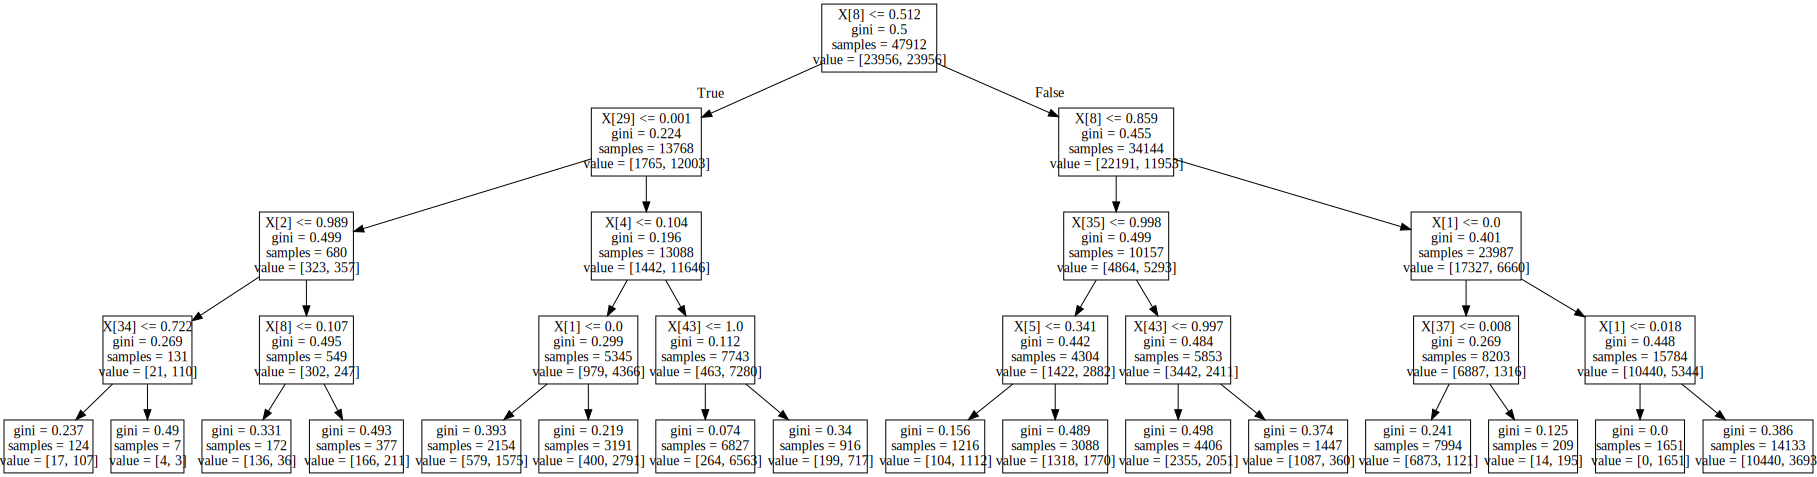

In [153]:
import graphviz
dot_data=tree.export_graphviz(clf_cart, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [154]:
tree.export_graphviz(clf_cart,out_file='tree.dot') 

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_cart.fit(X_train_resampled,y_train_resampled)
pred_train = clf_cart.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_cart.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.809
accuracy score of test set: 0.866
auc score of test set: 0.741
recall score of test set: 0.579
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.90      0.92     10967
        1.0       0.43      0.58      0.49      1386

avg / total       0.89      0.87      0.87     12353



In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_cart.fit(X_train_resampled,y_train_resampled)
pred_train = clf_cart.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_cart.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.808
accuracy score of test set: 0.881
auc score of test set: 0.725
recall score of test set: 0.524
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.93      0.93      7314
        1.0       0.47      0.52      0.50       922

avg / total       0.89      0.88      0.88      8236



In [84]:
#huge tree; very messy
#import graphviz
#dot_data=tree.export_graphviz(clf_cart, out_file=None)
#graph = graphviz.Source(dot_data)
#graph

## <font color='blue'>RF</font>
<font color='black'>Model Ensemble - Bagging (Average)</font> 

In [85]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=1, n_jobs=-1)

In [86]:
#https://www.kaggle.com/c/titanic/discussion/10089

In [87]:
#computationally expensive (time consuming) to do cv on RF

In [88]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)
    
    clf_rf.fit(X_train_resampled,y_train_resampled)
    pred_train = clf_rf.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = clf_rf.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

Fold 1:
accuracy score of training set: 0.994
accuracy score of test set: 0.883
auc score of test set: 0.649
recall score of test set: 0.345
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.92      0.95      0.94     12148
        1.0       0.49      0.34      0.40      1578

avg / total       0.87      0.88      0.87     13726

 
Fold 2:
accuracy score of training set: 0.994
accuracy score of test set: 0.886
auc score of test set: 0.641
recall score of test set: 0.328
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.92      0.95      0.94     12224
        1.0       0.47      0.33      0.39      1501

avg / total       0.87      0.89      0.88     13725

 
Fold 3:
accuracy score of training set: 0.994
accuracy score of test set: 0.886
auc score of test set: 0.646
recall score of test set: 0.335
classification report of test set: 
             precision    recall  f

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_rf.fit(X_train_resampled,y_train_resampled)
pred_train = clf_rf.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_rf.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.994
accuracy score of test set: 0.885
auc score of test set: 0.652
recall score of test set: 0.351
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.92      0.95      0.94     10967
        1.0       0.48      0.35      0.41      1386

avg / total       0.87      0.89      0.88     12353



In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_rf.fit(X_train_resampled,y_train_resampled)
pred_train = clf_rf.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_rf.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.994
accuracy score of test set: 0.887
auc score of test set: 0.656
recall score of test set: 0.357
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.92      0.95      0.94      7314
        1.0       0.50      0.36      0.41       922

avg / total       0.87      0.89      0.88      8236



In [91]:
np.round((clf_rf.feature_importances_)*10,3)

array([0.732, 1.039, 0.098, 0.255, 0.186, 0.251, 0.291, 1.462, 1.281,
       0.157, 0.155, 0.05 , 0.041, 0.077, 0.069, 0.051, 0.097, 0.034,
       0.11 , 0.04 , 0.103, 0.137, 0.122, 0.344, 0.   , 0.127, 0.142,
       0.113, 0.104, 0.3  , 0.028, 0.005, 0.027, 0.02 , 0.068, 0.097,
       0.028, 0.07 , 0.009, 0.202, 0.209, 0.159, 0.2  , 0.125, 0.113,
       0.671])

## <font color='blue'>Naive Bayes</font>

In [92]:
#Explanation between the different types of Naive Bayes methods: Gaussian, Multinomial, Bernoulli:
#https://blog.sicara.com/naive-bayes-classifier-sklearn-python-example-tips-42d100429e44

#Code to implement for Naive Bayes:
#http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [93]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [94]:
#computationally expensive (time consuming) to do cv on NB

In [95]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)
    
    gnb.fit(X_train_resampled,y_train_resampled)
    pred_train = gnb.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = gnb.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

Fold 1:
accuracy score of training set: 0.73
accuracy score of test set: 0.751
auc score of test set: 0.721
recall score of test set: 0.682
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.76      0.84     12165
        1.0       0.27      0.68      0.38      1561

avg / total       0.87      0.75      0.79     13726

 
Fold 2:
accuracy score of training set: 0.734
accuracy score of test set: 0.748
auc score of test set: 0.715
recall score of test set: 0.673
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.76      0.84     12187
        1.0       0.26      0.67      0.37      1538

avg / total       0.87      0.75      0.79     13725

 
Fold 3:
accuracy score of training set: 0.732
accuracy score of test set: 0.745
auc score of test set: 0.721
recall score of test set: 0.69
classification report of test set: 
             precision    recall  f1-

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

gnb.fit(X_train_resampled,y_train_resampled)
pred_train = gnb.predict(X_train_resampled)
true_train = y_train_resampled
pred = gnb.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.728
accuracy score of test set: 0.755
auc score of test set: 0.732
recall score of test set: 0.702
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.76      0.85     10967
        1.0       0.27      0.70      0.39      1386

avg / total       0.88      0.76      0.80     12353



In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

gnb.fit(X_train_resampled,y_train_resampled)
pred_train = gnb.predict(X_train_resampled)
true_train = y_train_resampled
pred = gnb.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.727
accuracy score of test set: 0.748
auc score of test set: 0.727
recall score of test set: 0.7
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.75      0.84      7314
        1.0       0.26      0.70      0.38       922

avg / total       0.88      0.75      0.79      8236



## <font color='blue'>NN</font>

In [98]:
from sklearn.neural_network import MLPClassifier
clf_nn=MLPClassifier(random_state=1)

In [99]:
#computationally expensive (time consuming) to do cv on NN

In [100]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)
    
    clf_nn.fit(X_train_resampled,y_train_resampled)
    pred_train = clf_nn.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = clf_nn.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

Fold 1:
accuracy score of training set: 0.896
accuracy score of test set: 0.846
auc score of test set: 0.657
recall score of test set: 0.414
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.92      0.90      0.91     12176
        1.0       0.35      0.41      0.38      1550

avg / total       0.86      0.85      0.85     13726

 
Fold 2:
accuracy score of training set: 0.902
accuracy score of test set: 0.851
auc score of test set: 0.658
recall score of test set: 0.408
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.92      0.91      0.92     12158
        1.0       0.36      0.41      0.39      1567

avg / total       0.86      0.85      0.85     13725

 
Fold 3:
accuracy score of training set: 0.901
accuracy score of test set: 0.817
auc score of test set: 0.671
recall score of test set: 0.483
classification report of test set: 
             precision    recall  f

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_nn.fit(X_train_resampled,y_train_resampled)
pred_train = clf_nn.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_nn.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.907
accuracy score of test set: 0.826
auc score of test set: 0.664
recall score of test set: 0.455
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.93      0.87      0.90     10967
        1.0       0.31      0.46      0.37      1386

avg / total       0.86      0.83      0.84     12353



In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_nn.fit(X_train_resampled,y_train_resampled)
pred_train = clf_nn.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_nn.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.88
accuracy score of test set: 0.867
auc score of test set: 0.683
recall score of test set: 0.445
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.93      0.92      0.92      7314
        1.0       0.41      0.44      0.43       922

avg / total       0.87      0.87      0.87      8236



## <font color='blue'>AdaBoost</font>
<font color='black'>Model Ensemble - Boosting (Weighted Average)</font> 

In [103]:
#http://scikit-learn.org/stable/modules/ensemble.html#adaboost

In [104]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(random_state=1)

In [105]:
#computationally expensive (time consuming) to do cv on AdaBoost

In [106]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)
    
    clf_ada.fit(X_train_resampled,y_train_resampled)
    pred_train = clf_ada.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = clf_ada.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

Fold 1:
accuracy score of training set: 0.866
accuracy score of test set: 0.873
auc score of test set: 0.712
recall score of test set: 0.504
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.92      0.93     12170
        1.0       0.45      0.50      0.47      1556

avg / total       0.88      0.87      0.88     13726

 
Fold 2:
accuracy score of training set: 0.857
accuracy score of test set: 0.869
auc score of test set: 0.706
recall score of test set: 0.496
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.92      0.93     12220
        1.0       0.42      0.50      0.45      1505

avg / total       0.88      0.87      0.87     13725

 
Fold 3:
accuracy score of training set: 0.861
accuracy score of test set: 0.87
auc score of test set: 0.702
recall score of test set: 0.484
classification report of test set: 
             precision    recall  f1

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_ada.fit(X_train_resampled,y_train_resampled)
pred_train = clf_ada.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_ada.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.856
accuracy score of test set: 0.864
auc score of test set: 0.716
recall score of test set: 0.527
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.91      0.92     10967
        1.0       0.42      0.53      0.46      1386

avg / total       0.88      0.86      0.87     12353



In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_ada.fit(X_train_resampled,y_train_resampled)
pred_train = clf_ada.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_ada.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.86
accuracy score of test set: 0.867
auc score of test set: 0.711
recall score of test set: 0.511
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.91      0.92      7314
        1.0       0.42      0.51      0.46       922

avg / total       0.88      0.87      0.87      8236



## <font color='blue'>Gradient Boost</font>
<font color='black'>Model Ensemble - Boosting (Weighted Average) + Fastest descent route</font> 

In [109]:
#http://scikit-learn.org/stable/modules/ensemble.html#adaboost

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gb = GradientBoostingClassifier(random_state=1)

In [111]:
#computationally expensive (time consuming) to do cv on Gradient Boost

In [112]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)
    
    clf_gb.fit(X_train_resampled,y_train_resampled)
    pred_train = clf_gb.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = clf_gb.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

Fold 1:
accuracy score of training set: 0.907
accuracy score of test set: 0.886
auc score of test set: 0.701
recall score of test set: 0.462
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.93      0.94      0.94     12145
        1.0       0.50      0.46      0.48      1581

avg / total       0.88      0.89      0.88     13726

 
Fold 2:
accuracy score of training set: 0.911
accuracy score of test set: 0.889
auc score of test set: 0.708
recall score of test set: 0.476
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.94      0.94     12219
        1.0       0.49      0.48      0.48      1506

avg / total       0.89      0.89      0.89     13725

 
Fold 3:
accuracy score of training set: 0.91
accuracy score of test set: 0.883
auc score of test set: 0.701
recall score of test set: 0.467
classification report of test set: 
             precision    recall  f1

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_gb.fit(X_train_resampled,y_train_resampled)
pred_train = clf_gb.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_gb.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.908
accuracy score of test set: 0.89
auc score of test set: 0.723
recall score of test set: 0.508
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.94      0.94     10967
        1.0       0.51      0.51      0.51      1386

avg / total       0.89      0.89      0.89     12353



In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_gb.fit(X_train_resampled,y_train_resampled)
pred_train = clf_gb.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_gb.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.906
accuracy score of test set: 0.889
auc score of test set: 0.712
recall score of test set: 0.485
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.94      0.94      7314
        1.0       0.50      0.48      0.49       922

avg / total       0.89      0.89      0.89      8236



## <font color='blue'>XG Boost</font>

In [115]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()

In [116]:
#computationally expensive (time consuming) to do cv on XG Boost

In [117]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)
    
    X_train_resampled = pd.DataFrame(X_train_resampled, columns = X_train.columns)
    y_train_resampled = (pd.Series(y_train_resampled)).rename('y_coded')
    
    xgb.fit(X_train_resampled,y_train_resampled)
    pred_train = xgb.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = xgb.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

/Users/tanhongyue/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/tanhongyue/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Fold 1:
accuracy score of training set: 0.911
accuracy score of test set: 0.884
auc score of test set: 0.697
recall score of test set: 0.455
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.93      0.94      0.93     12134
        1.0       0.50      0.45      0.48      1592

avg / total       0.88      0.88      0.88     13726

 


/Users/tanhongyue/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/tanhongyue/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Fold 2:
accuracy score of training set: 0.909
accuracy score of test set: 0.888
auc score of test set: 0.706
recall score of test set: 0.473
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.94      0.94     12226
        1.0       0.48      0.47      0.48      1499

avg / total       0.89      0.89      0.89     13725

 
Fold 3:
accuracy score of training set: 0.912
accuracy score of test set: 0.886
auc score of test set: 0.699
recall score of test set: 0.457
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.93      0.94      0.94     12177
        1.0       0.49      0.46      0.47      1548

avg / total       0.88      0.89      0.88     13725

 
Overall:
Training set accuracy for all folds, Mean & Std: 0.911, 0.001
Test set accuracy for all folds, Mean & Std: 0.886, 0.002
Test set auc for all folds, Mean & Std: 0.701, 0.004
Test set recall for all folds,

/Users/tanhongyue/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/tanhongyue/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

X_train_resampled = pd.DataFrame(X_train_resampled, columns = X_train.columns)
y_train_resampled = (pd.Series(y_train_resampled)).rename('y_coded')

xgb.fit(X_train_resampled,y_train_resampled)
pred_train = xgb.predict(X_train_resampled)
true_train = y_train_resampled
pred = xgb.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.907
accuracy score of test set: 0.886
auc score of test set: 0.721
recall score of test set: 0.507
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.93      0.94     10967
        1.0       0.49      0.51      0.50      1386

avg / total       0.89      0.89      0.89     12353



/Users/tanhongyue/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/tanhongyue/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

X_train_resampled = pd.DataFrame(X_train_resampled, columns = X_train.columns)
y_train_resampled = (pd.Series(y_train_resampled)).rename('y_coded')

xgb.fit(X_train_resampled,y_train_resampled)
pred_train = xgb.predict(X_train_resampled)
true_train = y_train_resampled
pred = xgb.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.905
accuracy score of test set: 0.885
auc score of test set: 0.713
recall score of test set: 0.492
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.93      0.94      7314
        1.0       0.49      0.49      0.49       922

avg / total       0.89      0.88      0.89      8236



/Users/tanhongyue/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/tanhongyue/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Method 4: Rebalancing using SMOTE

# Method 5: Rebalancing using Tomek

In [120]:
#gridsearch
#feature selection
#clustering